# Introductie Jupyter Notebook en Scikit-learn

Zoals tijdens het theoriecollege is toegelicht, maken we in deze cursus vaak gebruik van Jupyter Notebooks, een feitelijke standaard voor het _rapid prototyping_ van machine learning projecten. Het grote voordeel van notebooks is dat je de documentatie (in [markdown](https://www.markdownguide.org/)) direct tussen je runbare code hebt staan. Hoewel oorspronkelijk ontwikkeld voor Python zijn er inmiddels voor de meeste talen kernels ontwikkeld, zodat je ook Java, Go of PHP in notebooks kunt schrijven.


Een tweede stap die we gaan zetten is het gebruikmaken van een bibliotheek om het zware werk voor ons over te nemen: [scikit learn](https://scikit-learn.org/stable/index.html). Tot nu toe schreven we alle code zelf, maar in het echt maak je gebruik van deze bibliotheek: die is sneller en makkelijker en stelt je in staat om je te richten op het maken en beoordelen van modellen in plaats van het goedlaten werken van feitelijk vrij triviale programmacode.


Eén van de voordelen van sklearn is dat de meest gebruikte datasets [standaard in deze bibliotheek](https://scikit-learn.org/stable/datasets.html) zitten. Veel van de voorbeelden waar we de voorbije weken mee gewerkt hebben, zul je hierin terugvinden.


In deze opgave maken we gebruik van de [California Housing dataset](https://www.kaggle.com/datasets/camnugent/california-housing-prices). Run de volgende cel om de methode te importeren die deze dataset kan laden. Bestudeer [de documentatie](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) om te weten te komen wat er in deze dataset is opgeslagen en hoe je vervolgens de data daadwerkelijk laadt.


In [12]:
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import numpy as np


# Opdracht 1: data laden en inspecteren

Gebruik de onderstaande cel om de methode `fetch_california_housing` aan te roepen. Mocht je bij het laden SSL-errors krijgen, probeer dan de eerste regel in de bovenstaande cel uit het commentaar te halen en run die cel nogmaals. Gebruik `feature_names` om de namen van de eigenschappen van de dataset te weten te komen. Zorg ervoor dat je de _data_ van het resultaat in een variabele `X` zet, en de _target_ in een variabele `y`.


In [13]:
data: tuple = fetch_california_housing()

print(f"The features are: {' '.join(data.feature_names)}")

X: np.ndarray = data.data
y: np.ndarray = data.target
pop: np.ndarray = X[:, 4]

The features are: MedInc HouseAge AveRooms AveBedrms Population AveOccup Latitude Longitude


Zoals altijd maken we ook een paar visualisaties van de data om een beeld te krijgen van wat er zoal in zit. We beginnen met een scatter-plot; alleen dit keer plotten we niet de $y$-vector tegen een eigenschap uit de $X$-matrix; omdat we weten dat we te maken hebben met geografische data, is het leuker om de lengte- en breedtegraden tegenover elkaar te plotten. Maar gebruik van [`matplotlib.pyplot.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) om deze twee gegevens (_Longitude_ en _Latitude_, respectievelijk) te plotten.
Als je het goed hebt gedaan, kun je in de resulterende plot de kustlijn van Californië herkennen.


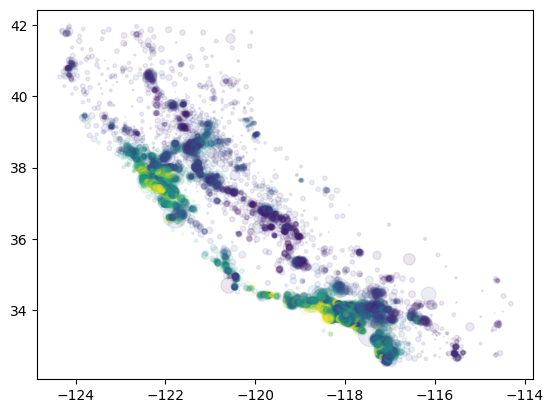

In [14]:
lat: np.ndarray = X[:, 6]
long: np.ndarray = X[:, 7]
plt.scatter(long, lat, alpha=.1, s=pop/100, c=y)

Zoals je in de documentatie hebt gelezen, is de target-value de gemiddelde waarde van de huizen in die omgeving, uitgedrukt in honderdduizend dollar. Natuurlijk moeten we wat statistieken uit deze target-vector halen. Vul onderstaande cel aan, zodat de juiste waarden worden afgedrukt. Maar vervolgens gebruik van [pyplot.hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) om een histogram van deze data te plotten. Beargumenteer op basis van de statistische gegevens in hoeveel `bins` je deze histogram moet onderverdelen.


In [15]:
min_value = np.min(y)
max_value = np.max(y)
stdev = np.std(y)
gemiddelde = np.mean(y)

print('==== DATA UIT DE TARGET-VECTOR ====')
print(f'Gemiddelde: {gemiddelde:>10.2f}')
print(f'Minimum: {min_value:>10.2f}')
print(f'Maximum: {max_value:>10.2f}')
print(f'StdDev: {stdev:>10.2f}')

"""
Voor deze dataset vindt ik qua bins er een hoog aantal moeten zijn (> 30)
omdat de data een grote spreiding heeft en een piek heeft bij de hogere waarden.
"""

==== DATA UIT DE TARGET-VECTOR ====
Gemiddelde:       2.07
Minimum:       0.15
Maximum:       5.00
StdDev:       1.15


'\nVoor deze dataset vindt ik qua bins er een hoog aantal moeten zijn (> 30)\nomdat de data een grote spreiding heeft en een piek heeft bij de hogere waarden.\n'

Een belangrijke stap om een beeld te krijgen van de data in de set is door gebruik te maken van een [histogram](https://nl.wikipedia.org/wiki/Histogram). Eén van de belangrijke vragen daarbij is in hoeveel `bins` je de data moet verdelen. Daarvoor zijn grofweg twee methoden: [Sturge's Rule](https://www.statology.org/sturges-rule/) en [Freedman-Diaconis rule](). Bestudeer [deze blog hierover](https://medium.datadriveninvestor.com/how-to-decide-on-the-number-of-bins-of-a-histogram-3c36dc5b1cd8) maak beide histogrammen. Let op dat het aantal `bins` een _geheel getal_ moet zijn.

Als het goed is, kom je in het eerste geval op 16 `bins` en in het tweede geval op 46. Welke van beide histogrammen vind je beter en waarom?


Bins met Sturge's Rule: 16


(array([ 101., 1597., 2351., 2318., 2897., 2444., 1868., 1582., 1284.,
         750.,  770.,  639.,  370.,  304.,  227., 1138.]),
 array([0.14999   , 0.45311625, 0.7562425 , 1.05936875, 1.362495  ,
        1.66562125, 1.9687475 , 2.27187375, 2.575     , 2.87812625,
        3.1812525 , 3.48437875, 3.787505  , 4.09063125, 4.3937575 ,
        4.69688375, 5.00001   ]),
 <BarContainer object of 16 artists>)

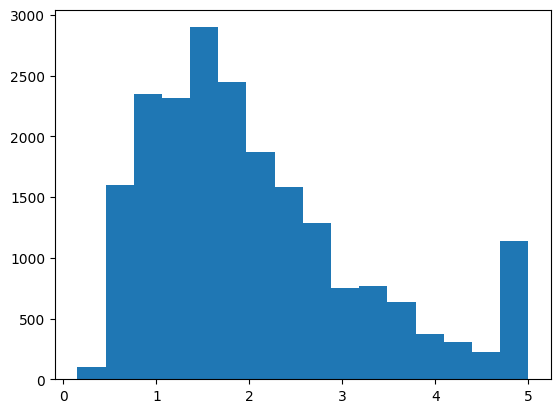

In [16]:
# histogram met Sturge's Rule
from math import ceil, floor, log2
m, n = X.shape
bins = 1 + ceil(log2(m))
print(f'Bins met Sturge\'s Rule: {bins}')
plt.hist(y, bins)

Bins width: 0.10581218049754278
Bins met Freedman-Diaconis rule: 46


"\nDe Freedman-Diaconis rule de beste keuze voor deze dataset. Zoals je ziet is er\nnog een piek bij de 5.0. Deze is niet te zien bij de Sturge's Rule. De\nFreedman-Diaconis rule is beter omdat deze rekening houdt met de spreiding van\nde data.\n"

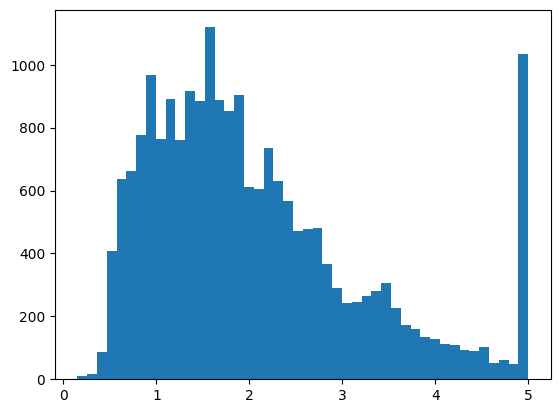

In [17]:
# histogram met Freedman-Diaconis rule
m, n = X.shape
q1, q3 = np.percentile(y, [25, 75])
bins_width = (2*(q3 - q1))/(m**(1./3.))
print(f'Bins width: {bins_width}')
bins_0 = ceil((max_value - min_value) / (bins_width))
print(f'Bins met Freedman-Diaconis rule: {bins_0}')
plt.hist(y, bins_0)


"""
De Freedman-Diaconis rule de beste keuze voor deze dataset. Zoals je ziet is er
nog een piek bij de 5.0. Deze is niet te zien bij de Sturge's Rule. De
Freedman-Diaconis rule is beter omdat deze rekening houdt met de spreiding van
de data.
"""

## Opdracht 2: Lineaire regressie

Nu gaan we de _features_ van deze dataset gebruiken om een voorspelling te doen van de waarde van een huis. In week 1 hebben we de wiskunde daarvan helemaal uitgeprogrammeerd; nu maken we gebruik van ['sklearn.linear_model.linear_regression'](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).


Verdeel de data in 20% testdata en 80% trainingsdata. Maak hiervoor gebruik van [`train_test_split`](https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html). Laad de data opnieuw in met de parameter `return_X_y` op `True`, zodat je direct de _features_ en de corresponderende _targets_ hebt. Waarom is deze split ook al weer nodig?


Gebruik vervolgens de methode [`fit`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit) om het model te trainen.


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data_x, data_y = fetch_california_housing(return_X_y=True)

train_x, test_x, train_y, test_y = train_test_split(
    data_x, data_y, test_size=0.2, train_size=0.8)

model = LinearRegression()
model.fit(train_x, train_y)

"""
De data is opgesplit in testing en training om zo overfitting te voorkomen.
Overfitting is het geval wanneer de data te goed past op de training data en daardoor niet goed past op de testing data.
"""

'\nDe data is opgesplit in testing en training om zo overfitting te voorkomen.\nOverfitting is het geval wanneer de data te goed past op de training data en daardoor niet goed past op de testing data.\n'

Gebruik nu de methode [`predict`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) om op basis van de test-data een uitspraak te doen over hoe goed het model presteert. Gebruik hiervoor de methode [`mean_square_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) uit `sklearn.metrics`. Hoe vind je dat het model presteert? Wat zou je kunnen doen om het model te verbeteren?


In [21]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(test_x)

mse = mean_squared_error(test_y, predictions)
print(f'MSE: {mse}')

"""
Ik verwacht dat de MSE laag is omdat de data goed past op de training data.
De MSE is ongeveer 0.53, wat betekent dat de data aardig goed past op de testing data.
Om de MSE te verlagen kan je meer data toevoegen aan de training data.
"""

MSE: 0.5387893974064469


'\nIk verwacht dat de MSE laag is omdat de data goed past op de training data.\nDe MSE is ongeveer 0.53, wat betekent dat de data aardig goed past op de testing data.\nOm de MSE te verlagen kan je meer data toevoegen aan de training data.\n'

Bestudeer tenslotte met behulp van het `coef_`-attribuut van het getrainde model om te weten te komen wat de formule is die het model gebruikt. Welke features zijn het belangrijkst en welke minder?


In [20]:
print(model.coef_)
np.column_stack((data.feature_names, np.around(model.coef_, 10)))

"""
Hieruit is te zien dat MedInc, ofwel de median income, de grootste invloed heeft
op de prijs van een huis, met een coëfficiënt van ongeveer 0.43. 
Ook is te zien dat de population een negatieve invloed heeft op de prijs van een huis.
"""


[ 4.41511294e-01  9.15724435e-03 -1.17863640e-01  7.57189771e-01
 -2.38906880e-06 -3.48728303e-03 -4.17170238e-01 -4.32959576e-01]


'\nHieruit is te zien dat MedInc, ofwel de median income, de grootste invloed heeft\nop de prijs van een huis, met een coëfficiënt van ongeveer 0.43. \nOok is te zien dat de population een negatieve invloed heeft op de prijs van een huis.\n'